In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger

import gans
from gans import MNISTDataModule, GANs

In [ ]:
# define the logger object
logger = TensorBoardLogger("gans_logs", name = "my_GANs")

dm = MNISTDataModule(batch_size=128)
model = GANs(*dm.size())
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=200,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
    logger=logger,
    check_val_every_n_epoch=10
)
trainer.fit(model, dm)

In [10]:
fake = model.on_validation_epoch_end()

In [21]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    # image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(fake[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

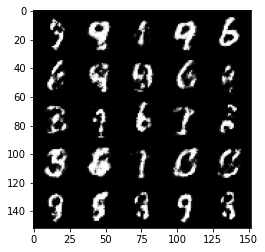

In [22]:
show_tensor_images(fake, num_images=25, size=(1, 28, 28))

In [8]:
# Start tensorboard.
os.environ['TENSORBOARD_BINARY'] = '/.../anaconda3/envs/pytorch/bin/tensorboard'
%load_ext tensorboard
%tensorboard --logdir gans_logs/ --port 8889 --bind_all

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 8889 (pid 71571), started 0:03:21 ago. (Use '!kill 71571' to kill it.)

In [9]:
# Start tensorboard.

%load_ext tensorboard
%tensorboard --logdir gans_logs/ --port 8889 --bind_all

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 8889 (pid 71571), started 0:03:30 ago. (Use '!kill 71571' to kill it.)